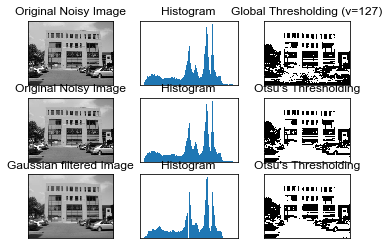

In [7]:
#如果是一副双峰图像(简 单来说双峰图像是指图像直方图中存在两个峰)呢?
#我们岂不是应该在两个峰 之间的峰谷选一个值作为阈值?
#这就是 Otsu 二值化要做的。简单来说就是对 一副双峰图像自动根据其直方图计算出一个阈值。

#函数还是 cv2.threshold()，但是需要多传入一个参数 (flag):cv2.THRESH_OTSU。
#这时要把阈值设为 0。然后算法会找到最 优阈值，这个最优阈值就是返回值 retVal。如果不使用 Otsu 二值化，返回的
#retVal 值与设定的阈值相等。

# -*- coding: utf-8 -*-

import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('/Users/ylshan/Documents/python/视觉/building.jpeg',0) # global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) # Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering #(5,5)为高斯核的大小，0 为标准差
blur = cv2.GaussianBlur(img,(5,5),0)
# 阈值一定要设为 0!
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
# 这里使用了 pyplot 中画直方图的方法，plt.hist, 要注意的是它的参数是一维数组
# 所以这里使用了(numpy)ravel 方法，将多维数组转换成一维，也可以使用 flatten 方法 #ndarray.flat 1-D iterator over an array.
#ndarray.flatten 1-D array copy of the elements of an array in row-major order. 
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    
plt.show()